In [1]:
import numpy as np
import pandas as pd
from db_handler import DBHandler
from matplotlib import pyplot as plt
from scipy import stats
from datetime import datetime, timedelta
from calendar import monthrange
%matplotlib inline

In [2]:
def parse_fetches(fetches):
    _new_fetches = list()
    for _fetch in fetches:
        for _doi in _fetch[0].split(", "):
            _new_fetches.append(
                (_doi, _fetch[1])
            )
    return _new_fetches

def get_dois_with_videos_within_days_from_publish(df, table_name, days_from=None, days_until=None):
    _set_target_dois = set()
    db_handler.sql_handler.select(table_name, ["idx_paper", "publishedAt"])
    fetches = db_handler.execute().fetchall()
    fetches = parse_fetches(fetches)
    
    for _row in fetches:
#         print("DOI:", _row[0])
        _target_paper = df[df["DOI"] == _row[0]]
#         if len(_target_paper) == 0:
#             continue
        if len(_target_paper) > 1:
            _target_paper = _target_paper.iloc[0]
        _dt_publish = datetime(_target_paper["Year"], _target_paper["Month"], 1)
        
        if days_from != None:
            _dt_video_from = _dt_publish + timedelta(days=days_from)
            if _row[1] < _dt_video_from:
                continue
        
        if days_until != None:
            _dt_video_until = _dt_publish + timedelta(days=days_until)
            if _row[1] > _dt_video_until:
                continue
        
        _set_target_dois.add(_row[0])
    
#     if days_until == None:
#         _set_target_dois = set(map(lambda _row: _row[0], fetches))
#     else:
#         for _row in fetches:
#             _target_paper = df[df["DOI"] == _row[0]]
#             if len(_target_paper) > 1:
#                 _target_paper = _target_paper.iloc[0]
#             _dt_publish = datetime(_target_paper["Year"], _target_paper["Month"], 1)
            
#             _dt_video_from = _dt_publish + timedelta(days=days_from)
#             _dt_video_until = _dt_publish + timedelta(days=days_until)
            
#             if _row[1] < _dt_video_deadline:
#                 _set_target_dois.add(_row[0])
    
    return _set_target_dois

In [3]:
df1 = pd.read_csv("/home/hweem/git/mastersdegree/ytcrawl/customs/scopus/scopus_life+earch_top60_1901-1906.csv")
# df2 = pd.read_csv("/home/hweem/git/mastersdegree/ytcrawl/customs/scopus/scopus_math+comp_top5perc_1701-1706.csv")
df3 = pd.read_csv("/home/hweem/git/mastersdegree/ytcrawl/customs/scopus/scopus_life+earch_top60_1401-1406.csv")
print(len(df1), len(df3))
df1 = df1.drop_duplicates(subset=["DOI"])
# df2 = df2.drop_duplicates(subset=["DOI"])
df3 = df3.drop_duplicates(subset=["DOI"])
print(len(df1), len(df3))

7742 7816
7735 7717


In [4]:
db_handler = DBHandler()
db_handler.sql_handler.select("scopus_videos_2014_life", ["idx_paper", "publishedAt"])
_videos_2014 = db_handler.execute().fetchall()
# db_handler.sql_handler.select("scopus_videos_2017_comp", ["idx_paper", "publishedAt"])
# _videos_2017 = db_handler.execute().fetchall()
db_handler.sql_handler.select("scopus_videos_2019_life", ["idx_paper", "publishedAt"])
_videos_2019 = db_handler.execute().fetchall()

	Command set: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2014_life`
	sql: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2014_life`;
	Command set: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2019_life`
	sql: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2019_life`;


In [5]:
_idx_papers_2019 = get_dois_with_videos_within_days_from_publish(df1, "scopus_videos_2019_life")
_idx_papers_2019_90 = get_dois_with_videos_within_days_from_publish(df1, "scopus_videos_2019_life", None, 90)
print(len(_idx_papers_2019), len(_idx_papers_2019_90))

_idx_papers_2014 = get_dois_with_videos_within_days_from_publish(df3, "scopus_videos_2014_life")
_idx_papers_2014_90 = get_dois_with_videos_within_days_from_publish(df3, "scopus_videos_2014_life", None, 90)
print(len(_idx_papers_2014), len(_idx_papers_2014_90))

	Command set: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2019_life`
	sql: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2019_life`;
	Command set: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2019_life`
	sql: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2019_life`;
134 99
	Command set: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2014_life`
	sql: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2014_life`;
	Command set: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2014_life`
	sql: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2014_life`;
78 18


{'whiskers': [<matplotlib.lines.Line2D at 0x7f1daf6787f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1daf678dd8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1daf678748>,
 'medians': [<matplotlib.lines.Line2D at 0x7f1daf6163c8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f1daf6166a0>,
 'means': []}

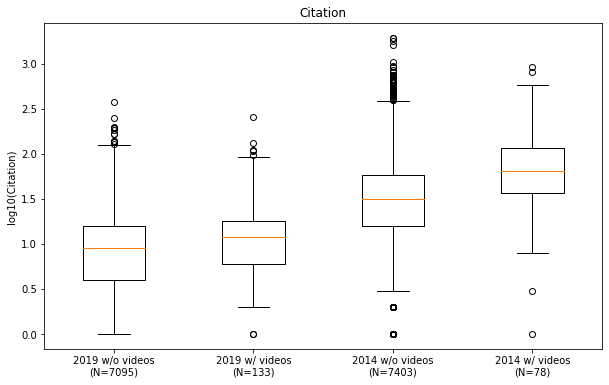

In [6]:
_2019_wo_videos_cit = np.log10(df1[~df1.DOI.isin(_idx_papers_2019)]["Cited by"].dropna().astype(int))
_2019_w_videos_cit = np.log10(df1[df1.DOI.isin(_idx_papers_2019)]["Cited by"].dropna().astype(int))

_2014_wo_videos_cit = np.log10(df3[~df3.DOI.isin(_idx_papers_2014)]["Cited by"].dropna().astype(int))
_2014_w_videos_cit = np.log10(df3[df3.DOI.isin(_idx_papers_2014)]["Cited by"].dropna().astype(int))

plt.figure(figsize=(10, 6))
plt.title("Citation")
# plt.yscale("log")
# plt.ylim([0, 200])
plt.ylabel("log10(Citation)")
plt.boxplot([
    _2019_wo_videos_cit,
    _2019_w_videos_cit,
    _2014_wo_videos_cit,
    _2014_w_videos_cit
],
    labels=[
        "2019 w/o videos\n(N=%s)"%len(_2019_wo_videos_cit),
        "2019 w/ videos\n(N=%s)"%len(_2019_w_videos_cit),
        "2014 w/o videos\n(N=%s)"%len(_2014_wo_videos_cit),
        "2014 w/ videos\n(N=%s)"%len(_2014_w_videos_cit)
    ]
)

In [7]:
_s2019, _p2019 = stats.ttest_ind(
    _2019_wo_videos_cit,
    _2019_w_videos_cit
)
print("2019\tS = %f\tp = %f"%(_s2019, _p2019))

_s2014, _p2014 = stats.ttest_ind(
    _2014_wo_videos_cit,
    _2014_w_videos_cit
)
print("2014\tS = %f\tp = %f"%(_s2014, _p2014))

2019	S = -3.968070	p = 0.000073
2014	S = -6.164704	p = 0.000000


/home/hweem/git/mastersdegree/ytcrawl/s-transformers/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/hweem/git/mastersdegree/ytcrawl/s-transformers/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/home/hweem/git/mastersdegree/ytcrawl/s-transformers/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/hweem/git/mastersdegree/ytcrawl/s-transformers/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/hweem/git/mastersdegree/ytcrawl/s-transfo

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1daf53c1d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1daf53c7b8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1daf53c128>,
 'medians': [<matplotlib.lines.Line2D at 0x7f1daf53cd68>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f1daf54b080>,
 'means': []}

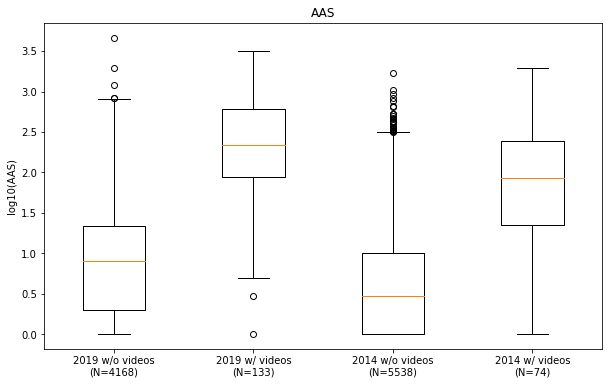

In [8]:
_2019_wo_videos_aas = np.log10(df1[~df1.DOI.isin(_idx_papers_2019)][df1["AAS"] != "None"]["AAS"].dropna().astype(int))
_2019_w_videos_aas = np.log10(df1[df1.DOI.isin(_idx_papers_2019)][df1["AAS"] != "None"]["AAS"].dropna().astype(int))

_2014_wo_videos_aas = np.log10(df3[~df3.DOI.isin(_idx_papers_2014)][df3["AAS"] != "None"]["AAS"].dropna().astype(int))
_2014_w_videos_aas = np.log10(df3[df3.DOI.isin(_idx_papers_2014)][df3["AAS"] != "None"]["AAS"].dropna().astype(int))

plt.figure(figsize=(10, 6))
plt.title("AAS")
# plt.yscale("log")
# plt.ylim([0, 200])
plt.ylabel("log10(AAS)")
plt.boxplot([
    _2019_wo_videos_aas,
    _2019_w_videos_aas,
    _2014_wo_videos_aas,
    _2014_w_videos_aas
],
    labels=[
        "2019 w/o videos\n(N=%s)"%len(_2019_wo_videos_aas),
        "2019 w/ videos\n(N=%s)"%len(_2019_w_videos_aas),
        "2014 w/o videos\n(N=%s)"%len(_2014_wo_videos_aas),
        "2014 w/ videos\n(N=%s)"%len(_2014_w_videos_aas)
    ]
)

In [9]:
_s2019, _p2019 = stats.ttest_ind(
    _2019_wo_videos_aas,
    _2019_w_videos_aas
)
print("2019\tS = %f\tp = %f"%(_s2019, _p2019))

_s2014, _p2014 = stats.ttest_ind(
    _2014_wo_videos_aas,
    _2014_w_videos_aas
)
print("2014\tS = %f\tp = %f"%(_s2014, _p2014))

2019	S = -23.744003	p = 0.000000
2014	S = -16.502451	p = 0.000000


comp분야와의 공통점: 비디오의 영향은 AAS가 Citation에서보다 더 즉발적인 효과가 나타남

comp분야와의 차이점:
1.comp의 2014, 2017, 2019의 AAS분포는 거의 비슷하지만, life+earth에선 2019 AAS가 2014 AAS보다 높게 형성되어있음
2.비디오 논문 수에 있어서, 2019가 2014보다 압도적으로 많음
-> 두 차이점 모두, 해당 분야의 대중적 인지도가 2014년 이후로 크게 증가한 증거?
3.2019 Citation에서 비디오의 유무는, comp보다 life에서 더 큰 유의성을 지님 (p=0.166(comp), 0.000(life)). 단 대상 논문이 comp에선 상위 5%, life에선 상위 1%이기 때문.

논문수가 비슷하면 상관없나? <- 비슷하지 않음...

/home/hweem/git/mastersdegree/ytcrawl/s-transformers/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/hweem/git/mastersdegree/ytcrawl/s-transformers/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/hweem/git/mastersdegree/ytcrawl/s-transformers/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/hweem/git/mastersdegree/ytcrawl/s-transformers/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


{'whiskers': [<matplotlib.lines.Line2D at 0x7f1daf1e2da0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1daf1f03c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1daf1e2cf8>,
 'medians': [<matplotlib.lines.Line2D at 0x7f1daf1f0978>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f1daf1f0c50>,
 'means': []}

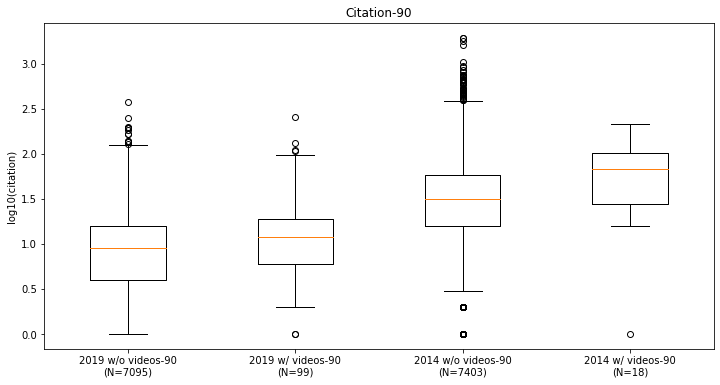

In [10]:
# _2019_90_wo_videos_cit = np.log10(df1[~df1.DOI.isin(_idx_papers_2019_90)][df1["Cited by"] != "None"]["Cited by"].dropna().astype(int))
_2019_90_w_videos_cit = np.log10(df1[df1.DOI.isin(_idx_papers_2019_90)][df1["Cited by"] != "None"]["Cited by"].dropna().astype(int))
# _2014_90_wo_videos_cit = np.log10(df3[~df3.DOI.isin(_idx_papers_2014_90)][df3["Cited by"] != "None"]["Cited by"].dropna().astype(int))
_2014_90_w_videos_cit = np.log10(df3[df3.DOI.isin(_idx_papers_2014_90)][df3["Cited by"] != "None"]["Cited by"].dropna().astype(int))

plt.figure(figsize=(12, 6))
plt.title("Citation-90")
# plt.yscale("log")
# plt.ylim([0, 200])
plt.ylabel("log10(citation)")
plt.boxplot([
    _2019_wo_videos_cit,
    _2019_90_w_videos_cit,
    _2014_wo_videos_cit,
    _2014_90_w_videos_cit
],
    labels=[
        "2019 w/o videos-90\n(N=%s)"%len(_2019_wo_videos_cit),
        "2019 w/ videos-90\n(N=%s)"%len(_2019_90_w_videos_cit),
        "2014 w/o videos-90\n(N=%s)"%len(_2014_wo_videos_cit),
        "2014 w/ videos-90\n(N=%s)"%len(_2014_90_w_videos_cit)
    ]
)

In [11]:
_s2019, _p2019 = stats.ttest_ind(
    _2019_wo_videos_cit,
    _2019_90_w_videos_cit
)
print("2019\tS = %f\tp = %f"%(_s2019, _p2019))

_s2014, _p2014 = stats.ttest_ind(
    _2014_wo_videos_cit,
    _2014_90_w_videos_cit
)
print("2014\tS = %f\tp = %f"%(_s2014, _p2014))

2019	S = -3.431868	p = 0.000603
2014	S = -2.044611	p = 0.040928


/home/hweem/git/mastersdegree/ytcrawl/s-transformers/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/hweem/git/mastersdegree/ytcrawl/s-transformers/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/hweem/git/mastersdegree/ytcrawl/s-transformers/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/hweem/git/mastersdegree/ytcrawl/s-transformers/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


{'whiskers': [<matplotlib.lines.Line2D at 0x7f1daf10ddd8>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1daf11e400>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1daf10dd30>,
 'medians': [<matplotlib.lines.Line2D at 0x7f1daf11e9b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f1daf11ec88>,
 'means': []}

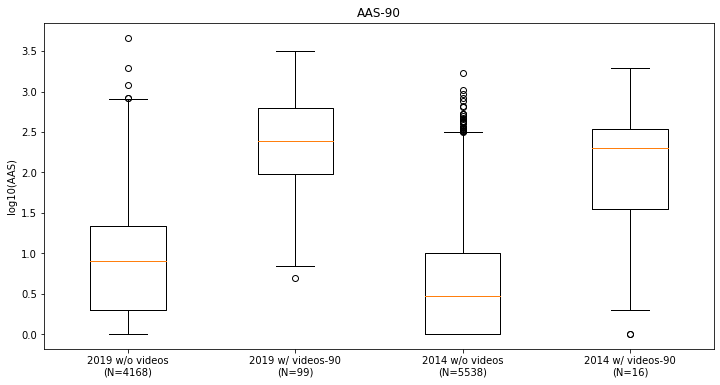

In [12]:
# _2019_90_wo_videos_aas = np.log10(df1[~df1.DOI.isin(_idx_papers_2019_90)][df1["AAS"] != "None"]["AAS"].dropna().astype(int))
_2019_90_w_videos_aas = np.log10(df1[df1.DOI.isin(_idx_papers_2019_90)][df1["AAS"] != "None"]["AAS"].dropna().astype(int))
# _2014_90_wo_videos_aas = np.log10(df3[~df3.DOI.isin(_idx_papers_2014_90)][df3["AAS"] != "None"]["AAS"].dropna().astype(int))
_2014_90_w_videos_aas = np.log10(df3[df3.DOI.isin(_idx_papers_2014_90)][df3["AAS"] != "None"]["AAS"].dropna().astype(int))

plt.figure(figsize=(12, 6))
plt.title("AAS-90")
# plt.yscale("log")
# plt.ylim([0, 200])
plt.ylabel("log10(AAS)")
plt.boxplot([
    _2019_wo_videos_aas,
    _2019_90_w_videos_aas,
    _2014_wo_videos_aas,
    _2014_90_w_videos_aas
],
    labels=[
        "2019 w/o videos\n(N=%s)"%len(_2019_wo_videos_aas),
        "2019 w/ videos-90\n(N=%s)"%len(_2019_90_w_videos_aas),
        "2014 w/o videos\n(N=%s)"%len(_2014_wo_videos_aas),
        "2014 w/ videos-90\n(N=%s)"%len(_2014_90_w_videos_aas)
    ]
)

In [13]:
_s2019, _p2019 = stats.ttest_ind(
    _2019_wo_videos_aas,
    _2019_90_w_videos_aas
)
print("2019\tS = %f\tp = %f"%(_s2019, _p2019))

_s2014, _p2014 = stats.ttest_ind(
    _2014_wo_videos_aas,
    _2014_90_w_videos_aas
)
print("2014\tS = %f\tp = %f"%(_s2014, _p2014))

2019	S = -21.844594	p = 0.000000
2014	S = -8.555980	p = 0.000000


comp와의 차이점:
1.comp에선 과거일수록 초기 비디오의 피인용수에 대한 영향력의 유의성이 커졌으나, life에선 반대(p=0.001(2019), 0.041(2014)) <- 2014 초기 비디오 논문 수가 적어서(19) 그럴수도.
2.life에선 2019 초기 비디오의 피인용수 영향력이 유의함.(p=0.001(life), 0.782(comp))
3.comp에선 과거일수록 초기 비디오의 AAS에 대한 영향력의 유의성이 떨어졌으나, life에서는 그렇지 않음.

In [14]:
_idx_papers_2019 = get_dois_with_videos_within_days_from_publish(df1, "scopus_videos_2019_life")
_idx_papers_2019_90 = get_dois_with_videos_within_days_from_publish(df1, "scopus_videos_2019_life", None, 90)
_idx_papers_2019_180 = get_dois_with_videos_within_days_from_publish(df1, "scopus_videos_2019_life", 90, 180)
_idx_papers_2019_270 = get_dois_with_videos_within_days_from_publish(df1, "scopus_videos_2019_life", 180, 270)
_idx_papers_2019_360 = get_dois_with_videos_within_days_from_publish(df1, "scopus_videos_2019_life", 270, 360)
_idx_papers_2019_rest = get_dois_with_videos_within_days_from_publish(df1, "scopus_videos_2019_life", 360, None)
print(len(_idx_papers_2019), len(_idx_papers_2019_90), len(_idx_papers_2019_180), len(_idx_papers_2019_270), len(_idx_papers_2019_360), len(_idx_papers_2019_rest))

_idx_papers_2014 = get_dois_with_videos_within_days_from_publish(df3, "scopus_videos_2014_life")
_idx_papers_2014_90 = get_dois_with_videos_within_days_from_publish(df3, "scopus_videos_2014_life", None, 90)
_idx_papers_2014_180 = get_dois_with_videos_within_days_from_publish(df3, "scopus_videos_2014_life", 90, 180)
_idx_papers_2014_270 = get_dois_with_videos_within_days_from_publish(df3, "scopus_videos_2014_life", 180, 270)
_idx_papers_2014_360 = get_dois_with_videos_within_days_from_publish(df3, "scopus_videos_2014_life", 270, 360)
_idx_papers_2014_rest = get_dois_with_videos_within_days_from_publish(df3, "scopus_videos_2014_life", 360, None)
print(len(_idx_papers_2014), len(_idx_papers_2014_90), len(_idx_papers_2014_180), len(_idx_papers_2014_270), len(_idx_papers_2014_360), len(_idx_papers_2014_rest))

	Command set: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2019_life`
	sql: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2019_life`;
	Command set: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2019_life`
	sql: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2019_life`;
	Command set: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2019_life`
	sql: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2019_life`;
	Command set: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2019_life`
	sql: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2019_life`;
	Command set: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2019_life`
	sql: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2019_life`;
	Command set: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2019_life`
	sql: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2019_life`;
134 99 13 26 19 22
	Command set: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2014_li

/home/hweem/git/mastersdegree/ytcrawl/s-transformers/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/hweem/git/mastersdegree/ytcrawl/s-transformers/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/home/hweem/git/mastersdegree/ytcrawl/s-transformers/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/hweem/git/mastersdegree/ytcrawl/s-transformers/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/hweem/git/mastersdegree/ytcrawl/s-transfo

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1daf077358>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1daf077940>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1daf0772b0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f1daf077ef0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f1daf083208>,
 'means': []}

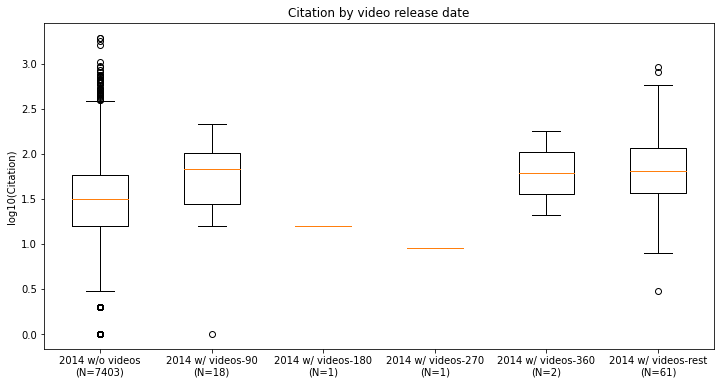

In [15]:
_2014_wo_videos_cit = np.log10(df3[~df3.DOI.isin(_idx_papers_2014)][df3["Cited by"] != "None"]["Cited by"].dropna().astype(int))
_2014_90_w_videos_cit = np.log10(df3[df3.DOI.isin(_idx_papers_2014_90)][df3["Cited by"] != "None"]["Cited by"].dropna().astype(int))
_2014_180_w_videos_cit = np.log10(df3[df3.DOI.isin(_idx_papers_2014_180)][df3["Cited by"] != "None"]["Cited by"].dropna().astype(int))
_2014_270_w_videos_cit = np.log10(df3[df3.DOI.isin(_idx_papers_2014_270)][df3["Cited by"] != "None"]["Cited by"].dropna().astype(int))
_2014_360_w_videos_cit = np.log10(df3[df3.DOI.isin(_idx_papers_2014_360)][df3["Cited by"] != "None"]["Cited by"].dropna().astype(int))
_2014_rest_w_videos_cit = np.log10(df3[df3.DOI.isin(_idx_papers_2014_rest)][df3["Cited by"] != "None"]["Cited by"].dropna().astype(int))

plt.figure(figsize=(12, 6))
plt.title("Citation by video release date")
# plt.yscale("log")
# plt.ylim([0, 200])
plt.ylabel("log10(Citation)")
plt.boxplot([
    _2014_wo_videos_cit,
    _2014_90_w_videos_cit,
    _2014_180_w_videos_cit,
    _2014_270_w_videos_cit,
    _2014_360_w_videos_cit,
    _2014_rest_w_videos_cit
],
    labels=[
        "2014 w/o videos\n(N=%s)"%len(_2014_wo_videos_cit),
        "2014 w/ videos-90\n(N=%s)"%len(_2014_90_w_videos_cit),
        "2014 w/ videos-180\n(N=%s)"%len(_2014_180_w_videos_cit),
        "2014 w/ videos-270\n(N=%s)"%len(_2014_270_w_videos_cit),
        "2014 w/ videos-360\n(N=%s)"%len(_2014_360_w_videos_cit),
        "2014 w/ videos-rest\n(N=%s)"%len(_2014_rest_w_videos_cit)
    ]
)

In [16]:
_s2014, _p2014 = stats.ttest_ind(
    _2014_wo_videos_cit,
    _2014_90_w_videos_cit
)
print("2014-90\tS = %f\tp = %f"%(_s2014, _p2014))
_s2014, _p2014 = stats.ttest_ind(
    _2014_wo_videos_cit,
    _2014_180_w_videos_cit
)
print("2014-180\tS = %f\tp = %f"%(_s2014, _p2014))
_s2014, _p2014 = stats.ttest_ind(
    _2014_wo_videos_cit,
    _2014_270_w_videos_cit
)
print("2014-270\tS = %f\tp = %f"%(_s2014, _p2014))
_s2014, _p2014 = stats.ttest_ind(
    _2014_wo_videos_cit,
    _2014_360_w_videos_cit
)
print("2014-360\tS = %f\tp = %f"%(_s2014, _p2014))
_s2014, _p2014 = stats.ttest_ind(
    _2014_wo_videos_cit,
    _2014_rest_w_videos_cit
)
print("2014-rest\tS = %f\tp = %f"%(_s2014, _p2014))

2014-90	S = -2.044611	p = 0.040928
2014-180	S = nan	p = nan
2014-270	S = nan	p = nan
2014-360	S = -0.954897	p = 0.339661
2014-rest	S = -5.862861	p = 0.000000


/home/hweem/git/mastersdegree/ytcrawl/s-transformers/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/home/hweem/git/mastersdegree/ytcrawl/s-transformers/lib/python3.7/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


2014 comp와의 공통점: 초창기(90)와 상당히 나중 비디오(rest)일수록 더 유의하다.

/home/hweem/git/mastersdegree/ytcrawl/s-transformers/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/hweem/git/mastersdegree/ytcrawl/s-transformers/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/home/hweem/git/mastersdegree/ytcrawl/s-transformers/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/hweem/git/mastersdegree/ytcrawl/s-transformers/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/hweem/git/mastersdegree/ytcrawl/s-transfo

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1daf168b38>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1daf12c438>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1daf168b00>,
 'medians': [<matplotlib.lines.Line2D at 0x7f1daf16d0f0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f1daf16d400>,
 'means': []}

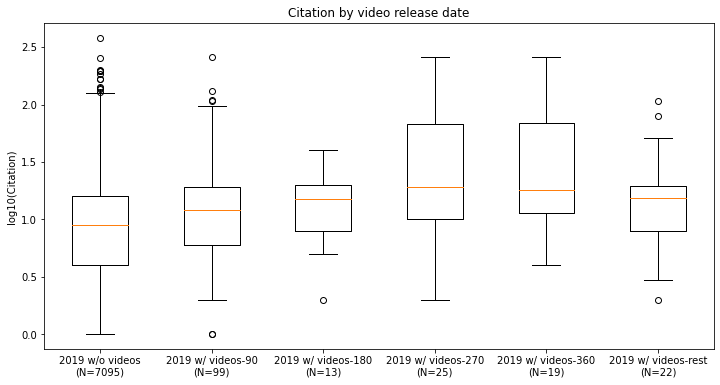

In [17]:
_2019_wo_videos_cit = np.log10(df1[~df1.DOI.isin(_idx_papers_2019)][df1["Cited by"] != "None"]["Cited by"].dropna().astype(int))
_2019_90_w_videos_cit = np.log10(df1[df1.DOI.isin(_idx_papers_2019_90)][df1["Cited by"] != "None"]["Cited by"].dropna().astype(int))
_2019_180_w_videos_cit = np.log10(df1[df1.DOI.isin(_idx_papers_2019_180)][df1["Cited by"] != "None"]["Cited by"].dropna().astype(int))
_2019_270_w_videos_cit = np.log10(df1[df1.DOI.isin(_idx_papers_2019_270)][df1["Cited by"] != "None"]["Cited by"].dropna().astype(int))
_2019_360_w_videos_cit = np.log10(df1[df1.DOI.isin(_idx_papers_2019_360)][df1["Cited by"] != "None"]["Cited by"].dropna().astype(int))
_2019_rest_w_videos_cit = np.log10(df1[df1.DOI.isin(_idx_papers_2019_rest)][df1["Cited by"] != "None"]["Cited by"].dropna().astype(int))

plt.figure(figsize=(12, 6))
plt.title("Citation by video release date")
# plt.yscale("log")
# plt.ylim([0, 200])
plt.ylabel("log10(Citation)")
plt.boxplot([
    _2019_wo_videos_cit,
    _2019_90_w_videos_cit,
    _2019_180_w_videos_cit,
    _2019_270_w_videos_cit,
    _2019_360_w_videos_cit,
    _2019_rest_w_videos_cit
],
    labels=[
        "2019 w/o videos\n(N=%s)"%len(_2019_wo_videos_cit),
        "2019 w/ videos-90\n(N=%s)"%len(_2019_90_w_videos_cit),
        "2019 w/ videos-180\n(N=%s)"%len(_2019_180_w_videos_cit),
        "2019 w/ videos-270\n(N=%s)"%len(_2019_270_w_videos_cit),
        "2019 w/ videos-360\n(N=%s)"%len(_2019_360_w_videos_cit),
        "2019 w/ videos-rest\n(N=%s)"%len(_2019_rest_w_videos_cit)
    ]
)

In [18]:
_s2019, _p2019 = stats.ttest_ind(
    _2019_wo_videos_cit,
    _2019_90_w_videos_cit
)
print("2019-90\tS = %f\tp = %f"%(_s2019, _p2019))
_s2019, _p2019 = stats.ttest_ind(
    _2019_wo_videos_cit,
    _2019_180_w_videos_cit
)
print("2019-180\tS = %f\tp = %f"%(_s2019, _p2019))
_s2019, _p2019 = stats.ttest_ind(
    _2019_wo_videos_cit,
    _2019_270_w_videos_cit
)
print("2019-270\tS = %f\tp = %f"%(_s2019, _p2019))
_s2019, _p2019 = stats.ttest_ind(
    _2019_wo_videos_cit,
    _2019_360_w_videos_cit
)
print("2019-360\tS = %f\tp = %f"%(_s2019, _p2019))
_s2019, _p2019 = stats.ttest_ind(
    _2019_wo_videos_cit,
    _2019_rest_w_videos_cit
)
print("2019-rest\tS = %f\tp = %f"%(_s2019, _p2019))

2019-90	S = -3.431868	p = 0.000603
2019-180	S = -1.480304	p = 0.138836
2019-270	S = -4.678255	p = 0.000003
2019-360	S = -4.632342	p = 0.000004
2019-rest	S = -2.318423	p = 0.020455


2019 comp와의 차이점: 전체적으로 유의하다.

2019 comp:
2019-90	S = 0.270785	p = 0.786561
2019-180	S = nan	p = nan
2019-270	S = 0.336739	p = 0.736319
2019-360	S = -2.410909	p = 0.015926
2019-rest	S = -1.018102	p = 0.308648

/home/hweem/git/mastersdegree/ytcrawl/s-transformers/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/hweem/git/mastersdegree/ytcrawl/s-transformers/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/home/hweem/git/mastersdegree/ytcrawl/s-transformers/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/hweem/git/mastersdegree/ytcrawl/s-transformers/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/hweem/git/mastersdegree/ytcrawl/s-transfo

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1daee5f2b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1daee5f898>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1daee5f208>,
 'medians': [<matplotlib.lines.Line2D at 0x7f1daee5fe48>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f1daee6b160>,
 'means': []}

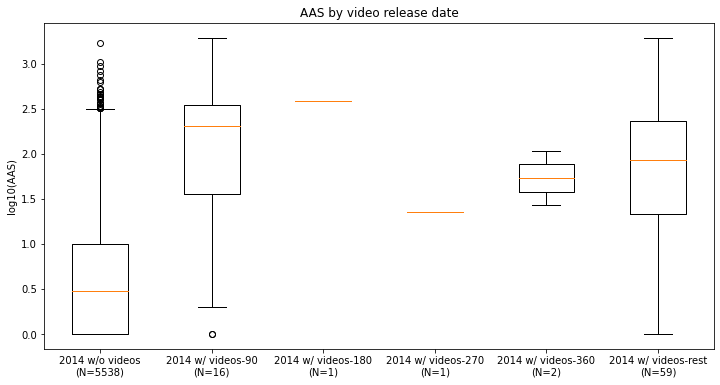

In [19]:
_2014_wo_videos_aas = np.log10(df3[~df3.DOI.isin(_idx_papers_2014)][df3["AAS"] != "None"]["AAS"].dropna().astype(int))
_2014_90_w_videos_aas = np.log10(df3[df3.DOI.isin(_idx_papers_2014_90)][df3["AAS"] != "None"]["AAS"].dropna().astype(int))
_2014_180_w_videos_aas = np.log10(df3[df3.DOI.isin(_idx_papers_2014_180)][df3["AAS"] != "None"]["AAS"].dropna().astype(int))
_2014_270_w_videos_aas = np.log10(df3[df3.DOI.isin(_idx_papers_2014_270)][df3["AAS"] != "None"]["AAS"].dropna().astype(int))
_2014_360_w_videos_aas = np.log10(df3[df3.DOI.isin(_idx_papers_2014_360)][df3["AAS"] != "None"]["AAS"].dropna().astype(int))
_2014_rest_w_videos_aas = np.log10(df3[df3.DOI.isin(_idx_papers_2014_rest)][df3["AAS"] != "None"]["AAS"].dropna().astype(int))

plt.figure(figsize=(12, 6))
plt.title("AAS by video release date")
# plt.yscale("log")
# plt.ylim([0, 200])
plt.ylabel("log10(AAS)")
plt.boxplot([
    _2014_wo_videos_aas,
    _2014_90_w_videos_aas,
    _2014_180_w_videos_aas,
    _2014_270_w_videos_aas,
    _2014_360_w_videos_aas,
    _2014_rest_w_videos_aas
],
    labels=[
        "2014 w/o videos\n(N=%s)"%len(_2014_wo_videos_aas),
        "2014 w/ videos-90\n(N=%s)"%len(_2014_90_w_videos_aas),
        "2014 w/ videos-180\n(N=%s)"%len(_2014_180_w_videos_aas),
        "2014 w/ videos-270\n(N=%s)"%len(_2014_270_w_videos_aas),
        "2014 w/ videos-360\n(N=%s)"%len(_2014_360_w_videos_aas),
        "2014 w/ videos-rest\n(N=%s)"%len(_2014_rest_w_videos_aas)
    ]
)

In [20]:
_s2014, _p2014 = stats.ttest_ind(
    _2014_wo_videos_aas,
    _2014_90_w_videos_aas
)
print("2014-90\tS = %f\tp = %f"%(_s2014, _p2014))
_s2014, _p2014 = stats.ttest_ind(
    _2014_wo_videos_aas,
    _2014_180_w_videos_aas
)
print("2014-180\tS = %f\tp = %f"%(_s2014, _p2014))
_s2014, _p2014 = stats.ttest_ind(
    _2014_wo_videos_aas,
    _2014_270_w_videos_aas
)
print("2014-270\tS = %f\tp = %f"%(_s2014, _p2014))
_s2014, _p2014 = stats.ttest_ind(
    _2014_wo_videos_aas,
    _2014_360_w_videos_aas
)
print("2014-360\tS = %f\tp = %f"%(_s2014, _p2014))
_s2014, _p2014 = stats.ttest_ind(
    _2014_wo_videos_aas,
    _2014_rest_w_videos_aas
)
print("2014-rest\tS = %f\tp = %f"%(_s2014, _p2014))

2014-90	S = -8.555980	p = 0.000000
2014-180	S = nan	p = nan
2014-270	S = nan	p = nan
2014-360	S = -2.534913	p = 0.011275
2014-rest	S = -15.180361	p = 0.000000


/home/hweem/git/mastersdegree/ytcrawl/s-transformers/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/home/hweem/git/mastersdegree/ytcrawl/s-transformers/lib/python3.7/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


/home/hweem/git/mastersdegree/ytcrawl/s-transformers/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/hweem/git/mastersdegree/ytcrawl/s-transformers/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/home/hweem/git/mastersdegree/ytcrawl/s-transformers/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/hweem/git/mastersdegree/ytcrawl/s-transformers/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/hweem/git/mastersdegree/ytcrawl/s-transfo

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1daedb69b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1daedb6f98>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1daedb6908>,
 'medians': [<matplotlib.lines.Line2D at 0x7f1daedc5588>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f1daedc5860>,
 'means': []}

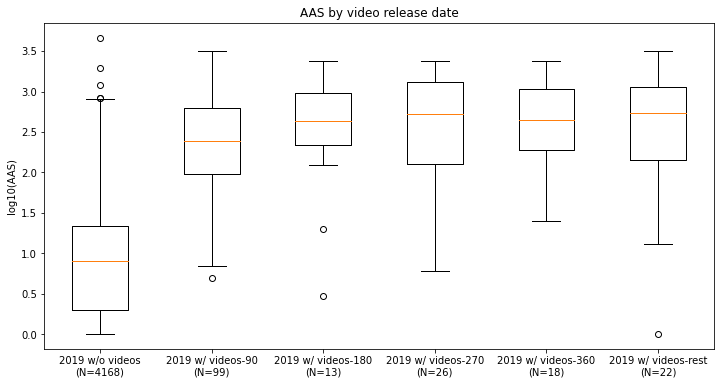

In [21]:
_2019_wo_videos_aas = np.log10(df1[~df1.DOI.isin(_idx_papers_2019)][df1["AAS"] != "None"]["AAS"].dropna().astype(int))
_2019_90_w_videos_aas = np.log10(df1[df1.DOI.isin(_idx_papers_2019_90)][df1["AAS"] != "None"]["AAS"].dropna().astype(int))
_2019_180_w_videos_aas = np.log10(df1[df1.DOI.isin(_idx_papers_2019_180)][df1["AAS"] != "None"]["AAS"].dropna().astype(int))
_2019_270_w_videos_aas = np.log10(df1[df1.DOI.isin(_idx_papers_2019_270)][df1["AAS"] != "None"]["AAS"].dropna().astype(int))
_2019_360_w_videos_aas = np.log10(df1[df1.DOI.isin(_idx_papers_2019_360)][df1["AAS"] != "None"]["AAS"].dropna().astype(int))
_2019_rest_w_videos_aas = np.log10(df1[df1.DOI.isin(_idx_papers_2019_rest)][df1["AAS"] != "None"]["AAS"].dropna().astype(int))

plt.figure(figsize=(12, 6))
plt.title("AAS by video release date")
# plt.yscale("log")
# plt.ylim([0, 200])
plt.ylabel("log10(AAS)")
plt.boxplot([
    _2019_wo_videos_aas,
    _2019_90_w_videos_aas,
    _2019_180_w_videos_aas,
    _2019_270_w_videos_aas,
    _2019_360_w_videos_aas,
    _2019_rest_w_videos_aas
],
    labels=[
        "2019 w/o videos\n(N=%s)"%len(_2019_wo_videos_aas),
        "2019 w/ videos-90\n(N=%s)"%len(_2019_90_w_videos_aas),
        "2019 w/ videos-180\n(N=%s)"%len(_2019_180_w_videos_aas),
        "2019 w/ videos-270\n(N=%s)"%len(_2019_270_w_videos_aas),
        "2019 w/ videos-360\n(N=%s)"%len(_2019_360_w_videos_aas),
        "2019 w/ videos-rest\n(N=%s)"%len(_2019_rest_w_videos_aas)
    ]
)

In [22]:
_s2019, _p2019 = stats.ttest_ind(
    _2019_wo_videos_aas,
    _2019_90_w_videos_aas
)
print("2019-90\tS = %f\tp = %f"%(_s2019, _p2019))
_s2019, _p2019 = stats.ttest_ind(
    _2019_wo_videos_aas,
    _2019_180_w_videos_aas
)
print("2019-180\tS = %f\tp = %f"%(_s2019, _p2019))
_s2019, _p2019 = stats.ttest_ind(
    _2019_wo_videos_aas,
    _2019_270_w_videos_aas
)
print("2019-270\tS = %f\tp = %f"%(_s2019, _p2019))
_s2019, _p2019 = stats.ttest_ind(
    _2019_wo_videos_aas,
    _2019_360_w_videos_aas
)
print("2019-360\tS = %f\tp = %f"%(_s2019, _p2019))
_s2019, _p2019 = stats.ttest_ind(
    _2019_wo_videos_aas,
    _2019_rest_w_videos_aas
)
print("2019-rest\tS = %f\tp = %f"%(_s2019, _p2019))

2019-90	S = -21.844594	p = 0.000000
2019-180	S = -8.725570	p = 0.000000
2019-270	S = -12.032223	p = 0.000000
2019-360	S = -10.868221	p = 0.000000
2019-rest	S = -11.317859	p = 0.000000


(2014 comp)Citation, AAS 둘 다, 초창기(90)와 나중(rest)에서 유의하고 180에서 유의성이 낮아지는 경향이 보인다..?
다만 180/270/360은 샘플이 적다는 점

2014, 2019 둘다 비디오 공개시기에 상관없이 AAS 분포는 유의하게 다르다.

2014 comp와의 차이점: 2014 comp의 AAS는 초기 비디오의 유무는 유의차를 보이지 않았으나, 2014 life 초기 비디오 논문은 전체적으로 완전히 유의하다.

2019 comp와의 차이점: 2019 comp-rest는 유의성이 떨어졌으나, 2019 life는 rest까지도 완전히 유의.

다만 2019 life엔 블랙홀 관측 논문 6편이 큰 주목을 받았기때문에 이례적인 경향에 일조하고 있을수 있음 -> 6편 제외한 scopus set에 대해 분석하면?

In [23]:
_list_idx_papers_bh = [
    "10.3847/2041-8213/ab0ec7",
    "10.3847/2041-8213/ab0c96",
    "10.3847/2041-8213/ab0c57",
    "10.3847/2041-8213/ab0e85",
    "10.3847/2041-8213/ab0f43",
    "10.3847/2041-8213/ab1141",
]

In [29]:
for _item in _list_idx_papers_bh:
    _idx_papers_2019.remove(_item)

{'10.1002/ecm.1348',
 '10.1002/fee.2015',
 '10.1016/j.apenergy.2018.12.045',
 '10.1016/j.chempr.2018.12.009',
 '10.1016/j.chempr.2019.02.026',
 '10.1016/j.cub.2018.10.065',
 '10.1016/j.cub.2018.11.009',
 '10.1016/j.cub.2018.11.030',
 '10.1016/j.cub.2018.11.052',
 '10.1016/j.cub.2018.11.059',
 '10.1016/j.cub.2018.11.063',
 '10.1016/j.cub.2018.11.070',
 '10.1016/j.cub.2018.12.007',
 '10.1016/j.cub.2018.12.022',
 '10.1016/j.cub.2018.12.028',
 '10.1016/j.cub.2018.12.038',
 '10.1016/j.cub.2018.12.040',
 '10.1016/j.cub.2018.12.042',
 '10.1016/j.cub.2018.12.051',
 '10.1016/j.cub.2019.01.006',
 '10.1016/j.cub.2019.01.008',
 '10.1016/j.cub.2019.01.026',
 '10.1016/j.cub.2019.01.029',
 '10.1016/j.cub.2019.01.060',
 '10.1016/j.cub.2019.01.069',
 '10.1016/j.cub.2019.02.006',
 '10.1016/j.cub.2019.02.024',
 '10.1016/j.cub.2019.02.036',
 '10.1016/j.cub.2019.02.045',
 '10.1016/j.cub.2019.02.047',
 '10.1016/j.cub.2019.02.049',
 '10.1016/j.cub.2019.02.050',
 '10.1016/j.cub.2019.03.004',
 '10.1016/j.cub.2

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1da9f314e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1daa151a20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1da9f31e10>,
 'medians': [<matplotlib.lines.Line2D at 0x7f1daa151ba8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f1da9f904a8>,
 'means': []}

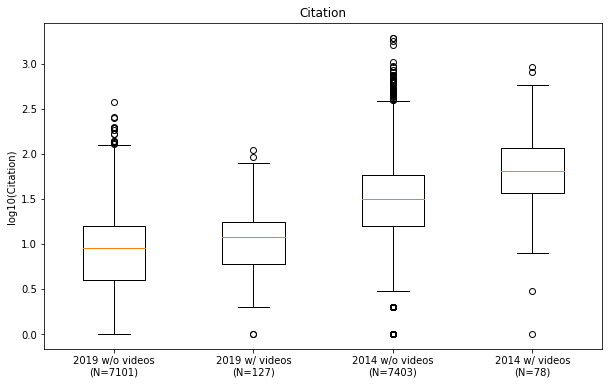

In [31]:
_2019_wo_videos_cit = np.log10(df1[~df1.DOI.isin(_idx_papers_2019)]["Cited by"].dropna().astype(int))
_2019_w_videos_cit = np.log10(df1[df1.DOI.isin(_idx_papers_2019)]["Cited by"].dropna().astype(int))

_2014_wo_videos_cit = np.log10(df3[~df3.DOI.isin(_idx_papers_2014)]["Cited by"].dropna().astype(int))
_2014_w_videos_cit = np.log10(df3[df3.DOI.isin(_idx_papers_2014)]["Cited by"].dropna().astype(int))

plt.figure(figsize=(10, 6))
plt.title("Citation")
# plt.yscale("log")
# plt.ylim([0, 200])
plt.ylabel("log10(Citation)")
plt.boxplot([
    _2019_wo_videos_cit,
    _2019_w_videos_cit,
    _2014_wo_videos_cit,
    _2014_w_videos_cit
],
    labels=[
        "2019 w/o videos\n(N=%s)"%len(_2019_wo_videos_cit),
        "2019 w/ videos\n(N=%s)"%len(_2019_w_videos_cit),
        "2014 w/o videos\n(N=%s)"%len(_2014_wo_videos_cit),
        "2014 w/ videos\n(N=%s)"%len(_2014_w_videos_cit)
    ]
)

In [32]:
_s2019, _p2019 = stats.ttest_ind(
    _2019_wo_videos_cit,
    _2019_w_videos_cit
)
print("2019\tS = %f\tp = %f"%(_s2019, _p2019))

_s2014, _p2014 = stats.ttest_ind(
    _2014_wo_videos_cit,
    _2014_w_videos_cit
)
print("2014\tS = %f\tp = %f"%(_s2014, _p2014))

2019	S = -2.680147	p = 0.007376
2014	S = -6.164704	p = 0.000000


citation w/ bh: 2019 약간 유의성이 떨어졌지만 (0.00007 -> 0.007) 그래도 0.01 이하

/home/hweem/git/mastersdegree/ytcrawl/s-transformers/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/hweem/git/mastersdegree/ytcrawl/s-transformers/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/home/hweem/git/mastersdegree/ytcrawl/s-transformers/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/hweem/git/mastersdegree/ytcrawl/s-transformers/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/hweem/git/mastersdegree/ytcrawl/s-transfo

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1daa5dd630>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1daa5ddc18>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1daa5dd588>,
 'medians': [<matplotlib.lines.Line2D at 0x7f1daa5f5208>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f1daa5f54e0>,
 'means': []}

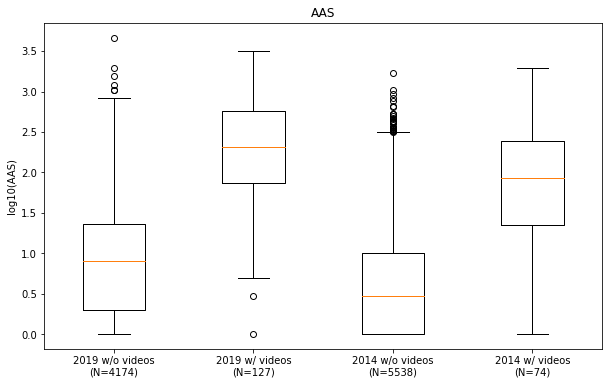

In [33]:
_2019_wo_videos_aas = np.log10(df1[~df1.DOI.isin(_idx_papers_2019)][df1["AAS"] != "None"]["AAS"].dropna().astype(int))
_2019_w_videos_aas = np.log10(df1[df1.DOI.isin(_idx_papers_2019)][df1["AAS"] != "None"]["AAS"].dropna().astype(int))

_2014_wo_videos_aas = np.log10(df3[~df3.DOI.isin(_idx_papers_2014)][df3["AAS"] != "None"]["AAS"].dropna().astype(int))
_2014_w_videos_aas = np.log10(df3[df3.DOI.isin(_idx_papers_2014)][df3["AAS"] != "None"]["AAS"].dropna().astype(int))

plt.figure(figsize=(10, 6))
plt.title("AAS")
# plt.yscale("log")
# plt.ylim([0, 200])
plt.ylabel("log10(AAS)")
plt.boxplot([
    _2019_wo_videos_aas,
    _2019_w_videos_aas,
    _2014_wo_videos_aas,
    _2014_w_videos_aas
],
    labels=[
        "2019 w/o videos\n(N=%s)"%len(_2019_wo_videos_aas),
        "2019 w/ videos\n(N=%s)"%len(_2019_w_videos_aas),
        "2014 w/o videos\n(N=%s)"%len(_2014_wo_videos_aas),
        "2014 w/ videos\n(N=%s)"%len(_2014_w_videos_aas)
    ]
)

In [34]:
_s2019, _p2019 = stats.ttest_ind(
    _2019_wo_videos_aas,
    _2019_90_w_videos_aas
)
print("2019\tS = %f\tp = %f"%(_s2019, _p2019))

_s2014, _p2014 = stats.ttest_ind(
    _2014_wo_videos_aas,
    _2014_90_w_videos_aas
)
print("2014\tS = %f\tp = %f"%(_s2014, _p2014))

2019	S = -21.690412	p = 0.000000
2014	S = -8.555980	p = 0.000000


AAS w/o bh: w/ bh과 같음

In [35]:
_idx_papers_2019 = get_dois_with_videos_within_days_from_publish(df1, "scopus_videos_2019_life")
_idx_papers_2019_90 = get_dois_with_videos_within_days_from_publish(df1, "scopus_videos_2019_life", None, 90)
_idx_papers_2019_180 = get_dois_with_videos_within_days_from_publish(df1, "scopus_videos_2019_life", 90, 180)
_idx_papers_2019_270 = get_dois_with_videos_within_days_from_publish(df1, "scopus_videos_2019_life", 180, 270)
_idx_papers_2019_360 = get_dois_with_videos_within_days_from_publish(df1, "scopus_videos_2019_life", 270, 360)
_idx_papers_2019_rest = get_dois_with_videos_within_days_from_publish(df1, "scopus_videos_2019_life", 360, None)
print(len(_idx_papers_2019), len(_idx_papers_2019_90), len(_idx_papers_2019_180), len(_idx_papers_2019_270), len(_idx_papers_2019_360), len(_idx_papers_2019_rest))

_idx_papers_2014 = get_dois_with_videos_within_days_from_publish(df3, "scopus_videos_2014_life")
_idx_papers_2014_90 = get_dois_with_videos_within_days_from_publish(df3, "scopus_videos_2014_life", None, 90)
_idx_papers_2014_180 = get_dois_with_videos_within_days_from_publish(df3, "scopus_videos_2014_life", 90, 180)
_idx_papers_2014_270 = get_dois_with_videos_within_days_from_publish(df3, "scopus_videos_2014_life", 180, 270)
_idx_papers_2014_360 = get_dois_with_videos_within_days_from_publish(df3, "scopus_videos_2014_life", 270, 360)
_idx_papers_2014_rest = get_dois_with_videos_within_days_from_publish(df3, "scopus_videos_2014_life", 360, None)
print(len(_idx_papers_2014), len(_idx_papers_2014_90), len(_idx_papers_2014_180), len(_idx_papers_2014_270), len(_idx_papers_2014_360), len(_idx_papers_2014_rest))

	Command set: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2019_life`
	sql: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2019_life`;
	Command set: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2019_life`
	sql: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2019_life`;
	Command set: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2019_life`
	sql: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2019_life`;
	Command set: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2019_life`
	sql: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2019_life`;
	Command set: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2019_life`
	sql: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2019_life`;
	Command set: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2019_life`
	sql: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2019_life`;
134 99 13 26 19 22
	Command set: SELECT `idx_paper`, `publishedAt` FROM `scopus_videos_2014_li

/home/hweem/git/mastersdegree/ytcrawl/s-transformers/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/hweem/git/mastersdegree/ytcrawl/s-transformers/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/home/hweem/git/mastersdegree/ytcrawl/s-transformers/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/hweem/git/mastersdegree/ytcrawl/s-transformers/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/hweem/git/mastersdegree/ytcrawl/s-transfo

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1daede8be0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1daede8780>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1daede89b0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f1daeeb62e8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f1daeeb6710>,
 'means': []}

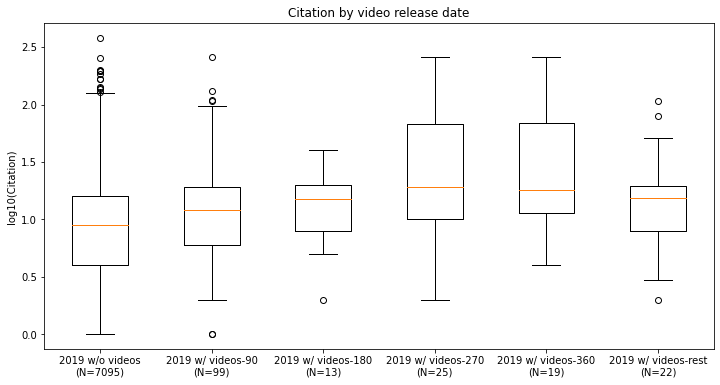

In [36]:
_2019_wo_videos_cit = np.log10(df1[~df1.DOI.isin(_idx_papers_2019)][df1["Cited by"] != "None"]["Cited by"].dropna().astype(int))
_2019_90_w_videos_cit = np.log10(df1[df1.DOI.isin(_idx_papers_2019_90)][df1["Cited by"] != "None"]["Cited by"].dropna().astype(int))
_2019_180_w_videos_cit = np.log10(df1[df1.DOI.isin(_idx_papers_2019_180)][df1["Cited by"] != "None"]["Cited by"].dropna().astype(int))
_2019_270_w_videos_cit = np.log10(df1[df1.DOI.isin(_idx_papers_2019_270)][df1["Cited by"] != "None"]["Cited by"].dropna().astype(int))
_2019_360_w_videos_cit = np.log10(df1[df1.DOI.isin(_idx_papers_2019_360)][df1["Cited by"] != "None"]["Cited by"].dropna().astype(int))
_2019_rest_w_videos_cit = np.log10(df1[df1.DOI.isin(_idx_papers_2019_rest)][df1["Cited by"] != "None"]["Cited by"].dropna().astype(int))

plt.figure(figsize=(12, 6))
plt.title("Citation by video release date")
# plt.yscale("log")
# plt.ylim([0, 200])
plt.ylabel("log10(Citation)")
plt.boxplot([
    _2019_wo_videos_cit,
    _2019_90_w_videos_cit,
    _2019_180_w_videos_cit,
    _2019_270_w_videos_cit,
    _2019_360_w_videos_cit,
    _2019_rest_w_videos_cit
],
    labels=[
        "2019 w/o videos\n(N=%s)"%len(_2019_wo_videos_cit),
        "2019 w/ videos-90\n(N=%s)"%len(_2019_90_w_videos_cit),
        "2019 w/ videos-180\n(N=%s)"%len(_2019_180_w_videos_cit),
        "2019 w/ videos-270\n(N=%s)"%len(_2019_270_w_videos_cit),
        "2019 w/ videos-360\n(N=%s)"%len(_2019_360_w_videos_cit),
        "2019 w/ videos-rest\n(N=%s)"%len(_2019_rest_w_videos_cit)
    ]
)

In [37]:
_s2019, _p2019 = stats.ttest_ind(
    _2019_wo_videos_cit,
    _2019_90_w_videos_cit
)
print("2019-90\tS = %f\tp = %f"%(_s2019, _p2019))
_s2019, _p2019 = stats.ttest_ind(
    _2019_wo_videos_cit,
    _2019_180_w_videos_cit
)
print("2019-180\tS = %f\tp = %f"%(_s2019, _p2019))
_s2019, _p2019 = stats.ttest_ind(
    _2019_wo_videos_cit,
    _2019_270_w_videos_cit
)
print("2019-270\tS = %f\tp = %f"%(_s2019, _p2019))
_s2019, _p2019 = stats.ttest_ind(
    _2019_wo_videos_cit,
    _2019_360_w_videos_cit
)
print("2019-360\tS = %f\tp = %f"%(_s2019, _p2019))
_s2019, _p2019 = stats.ttest_ind(
    _2019_wo_videos_cit,
    _2019_rest_w_videos_cit
)
print("2019-rest\tS = %f\tp = %f"%(_s2019, _p2019))

2019-90	S = -3.431868	p = 0.000603
2019-180	S = -1.480304	p = 0.138836
2019-270	S = -4.678255	p = 0.000003
2019-360	S = -4.632342	p = 0.000004
2019-rest	S = -2.318423	p = 0.020455


Citation by video release date: w/ bh와 w/o bh 비교시 별 차이없음

/home/hweem/git/mastersdegree/ytcrawl/s-transformers/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/hweem/git/mastersdegree/ytcrawl/s-transformers/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/home/hweem/git/mastersdegree/ytcrawl/s-transformers/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/hweem/git/mastersdegree/ytcrawl/s-transformers/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/hweem/git/mastersdegree/ytcrawl/s-transfo

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1daa72ff60>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1daece2ac8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1daa72f550>,
 'medians': [<matplotlib.lines.Line2D at 0x7f1daece27b8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f1daa799978>,
 'means': []}

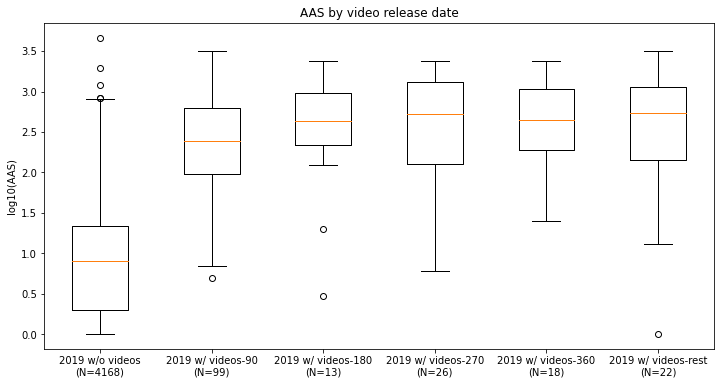

In [38]:
_2019_wo_videos_aas = np.log10(df1[~df1.DOI.isin(_idx_papers_2019)][df1["AAS"] != "None"]["AAS"].dropna().astype(int))
_2019_90_w_videos_aas = np.log10(df1[df1.DOI.isin(_idx_papers_2019_90)][df1["AAS"] != "None"]["AAS"].dropna().astype(int))
_2019_180_w_videos_aas = np.log10(df1[df1.DOI.isin(_idx_papers_2019_180)][df1["AAS"] != "None"]["AAS"].dropna().astype(int))
_2019_270_w_videos_aas = np.log10(df1[df1.DOI.isin(_idx_papers_2019_270)][df1["AAS"] != "None"]["AAS"].dropna().astype(int))
_2019_360_w_videos_aas = np.log10(df1[df1.DOI.isin(_idx_papers_2019_360)][df1["AAS"] != "None"]["AAS"].dropna().astype(int))
_2019_rest_w_videos_aas = np.log10(df1[df1.DOI.isin(_idx_papers_2019_rest)][df1["AAS"] != "None"]["AAS"].dropna().astype(int))

plt.figure(figsize=(12, 6))
plt.title("AAS by video release date")
# plt.yscale("log")
# plt.ylim([0, 200])
plt.ylabel("log10(AAS)")
plt.boxplot([
    _2019_wo_videos_aas,
    _2019_90_w_videos_aas,
    _2019_180_w_videos_aas,
    _2019_270_w_videos_aas,
    _2019_360_w_videos_aas,
    _2019_rest_w_videos_aas
],
    labels=[
        "2019 w/o videos\n(N=%s)"%len(_2019_wo_videos_aas),
        "2019 w/ videos-90\n(N=%s)"%len(_2019_90_w_videos_aas),
        "2019 w/ videos-180\n(N=%s)"%len(_2019_180_w_videos_aas),
        "2019 w/ videos-270\n(N=%s)"%len(_2019_270_w_videos_aas),
        "2019 w/ videos-360\n(N=%s)"%len(_2019_360_w_videos_aas),
        "2019 w/ videos-rest\n(N=%s)"%len(_2019_rest_w_videos_aas)
    ]
)

In [39]:
_s2019, _p2019 = stats.ttest_ind(
    _2019_wo_videos_aas,
    _2019_90_w_videos_aas
)
print("2019-90\tS = %f\tp = %f"%(_s2019, _p2019))
_s2019, _p2019 = stats.ttest_ind(
    _2019_wo_videos_aas,
    _2019_180_w_videos_aas
)
print("2019-180\tS = %f\tp = %f"%(_s2019, _p2019))
_s2019, _p2019 = stats.ttest_ind(
    _2019_wo_videos_aas,
    _2019_270_w_videos_aas
)
print("2019-270\tS = %f\tp = %f"%(_s2019, _p2019))
_s2019, _p2019 = stats.ttest_ind(
    _2019_wo_videos_aas,
    _2019_360_w_videos_aas
)
print("2019-360\tS = %f\tp = %f"%(_s2019, _p2019))
_s2019, _p2019 = stats.ttest_ind(
    _2019_wo_videos_aas,
    _2019_rest_w_videos_aas
)
print("2019-rest\tS = %f\tp = %f"%(_s2019, _p2019))

2019-90	S = -21.844594	p = 0.000000
2019-180	S = -8.725570	p = 0.000000
2019-270	S = -12.032223	p = 0.000000
2019-360	S = -10.868221	p = 0.000000
2019-rest	S = -11.317859	p = 0.000000


AAS by video release date: w/ bh와 w/o bh 비교시 별 차이없음

결론: 블랙홀 관측 논문을 제외하고 2019 분석 해봐도, 해당 논문 포함 분석 결과와 유의성에 있어 거의 동일